**Reading Data using Panda**

In [53]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/Advertising.csv', index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

**Visualizing data using seaborn**

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


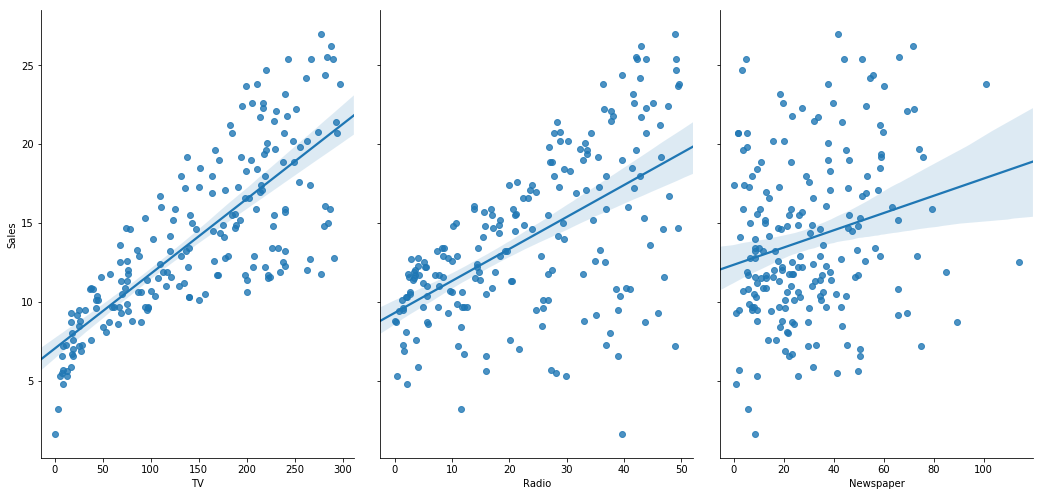

In [60]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [38]:
feature_cols = ['TV','Radio','Newspaper']
x = data[feature_cols]
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [39]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [41]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [42]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [44]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


**Linear regression**

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

2.8889948826924883
[0.04703954 0.17947683 0.00490964]


In [48]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.047039543897348025),
 ('Radio', 0.17947682877911497),
 ('Newspaper', 0.004909641595160183)]

In [49]:
y_pred = linreg.predict(x_test)

**Root Mean Squared Error**

In [50]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.7683004317052737


## Cross-validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(linreg,x,y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]
